In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf
import indicators
import yfinance as yf

In [36]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

In [37]:
df_btc = pd.read_csv('../price_app2/BTC-USD-L.csv')
df_btc.columns = map(str.lower, df_btc.columns)
df_btc = df_btc.drop('adj close', axis=1)
df_btc['Name'] = 'BTC'
df_btc.head()

df_one_year_btc = df_btc[df_btc.index >= 1680]
df_one_year_btc.head()

df_aselsan = yf.download('ASELS.IS', start="2021-08-01", end="2022-08-22")
df_aselsan.columns = map(str.lower, df_aselsan.columns)
# df_one_year_btc = df_btc

[*********************100%***********************]  1 of 1 completed


In [38]:
def get_ema_cum(df):
    indicators.ema(df, 10, 'close')
    indicators.ema(df, 50, 'close')
    indicators.ema(df, 9, 'close')
    indicators.ema(df, 12, 'close')
    indicators.ema(df, 26, 'close')
    indicators.macd(df)
    #indicators.acc_dist(df, open_col='open', high_col='high', low_col='low', close_col='close', vol_col='volume')
    df['buy_signal'] = np.nan
# Bullish signal ema5 > ema35

get_ema_cum(df_one_year_btc)
get_ema_cum(df_aselsan)

df_signal_btc = df_one_year_btc['buy_signal']
df_signal_btc = pd.DataFrame(df_signal_btc)

df_sg_aselsan = df_aselsan['buy_signal']
df_sg_aselsan = pd.DataFrame(df_sg_aselsan)

df_one_year_btc

/mnt/c/Users/kozan/Desktop/Sen_Des_Proj/TF_Deep_Learing_book/indicators_st/indicators.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()
/mnt/c/Users/kozan/Desktop/Sen_Des_Proj/TF_Deep_Learing_book/indicators_st/indicators.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()
/mnt/c

,date,open,high,low,close,volume,Name,ema10,ema50,ema9,ema12,ema26,macd_val,macd_signal_line,buy_signal
1680,2021-10-28,58470.730469,62128.632813,58206.917969,60622.136719,45257083247,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1681,2021-10-29,60624.871094,62927.609375,60329.964844,62227.964844,36856881767,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1682,2021-10-30,62239.363281,62330.144531,60918.386719,61888.832031,32157938616,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1683,2021-10-31,61850.488281,62406.171875,60074.328125,61318.957031,32241199927,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1684,2021-11-01,61320.449219,62419.003906,59695.183594,61004.406250,36150572843,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2022-08-19,23213.312500,23213.312500,20868.847656,20877.552734,40509610260,BTC,23213.162028,25712.056054,23237.499035,23160.137925,23410.377797,-250.239872,-573.855076,NaN
1976,2022-08-20,20872.841797,21350.806641,20856.730469,21166.060547,27595671000,BTC,23027.061893,25622.669415,23030.355186,23006.747357,23327.253809,-320.506452,-548.520213,NaN
1977,2022-08-21,21160.392578,21668.845703,21103.197266,21534.121094,23102307723,BTC,22891.340002,25542.281844,22880.731777,22893.468414,23260.840620,-367.372206,-530.405413,NaN
1978,2022-08-22,21531.462891,21531.462891,20939.183594,21398.908203,31666498758,BTC,22755.664384,25460.820700,22732.549419,22778.502244,23191.879293,-413.377049,-518.702576,NaN


In [39]:
for i in range(300):
    if df_one_year_btc['ema12'].iloc[i] > df_one_year_btc['ema26'].iloc[i]:
        # print('true value', df_one_year_btc['close'].iloc[i])
        df_signal_btc.iloc[i] = df_one_year_btc['close'].iloc[i]


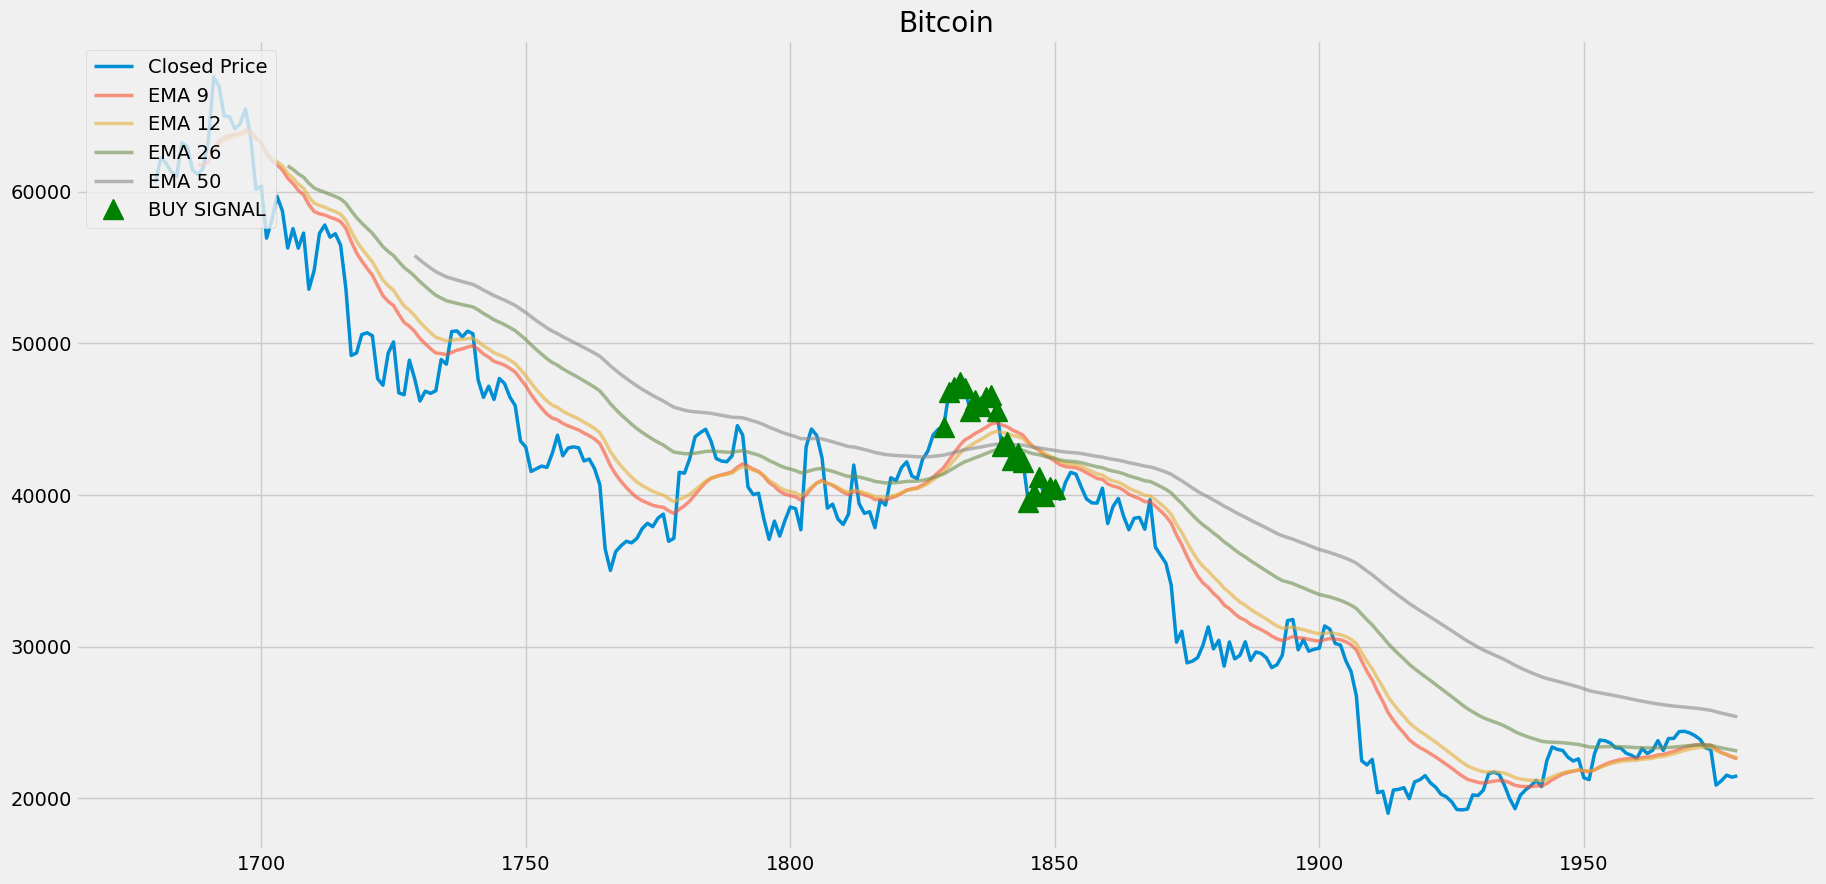

In [40]:
plt.plot(df_one_year_btc.close, linewidth=2.5, label="Closed Price")
plt.plot(df_one_year_btc.ema9, linewidth=2.5, alpha=0.6, label='EMA 9')
plt.plot(df_one_year_btc.ema12, linewidth=2.5, alpha=0.6, label='EMA 12')
plt.plot(df_one_year_btc.ema26, linewidth=2.5, alpha=0.6, label='EMA 26')
plt.plot(df_one_year_btc.ema50, linewidth=2.5, alpha=0.6, label='EMA 50')
plt.plot(df_one_year_btc.index, df_signal_btc, marker='^', markersize=15, color='green', linewidth=0, label='BUY SIGNAL')
plt.legend(loc='upper left')
plt.title('Bitcoin')
plt.show()

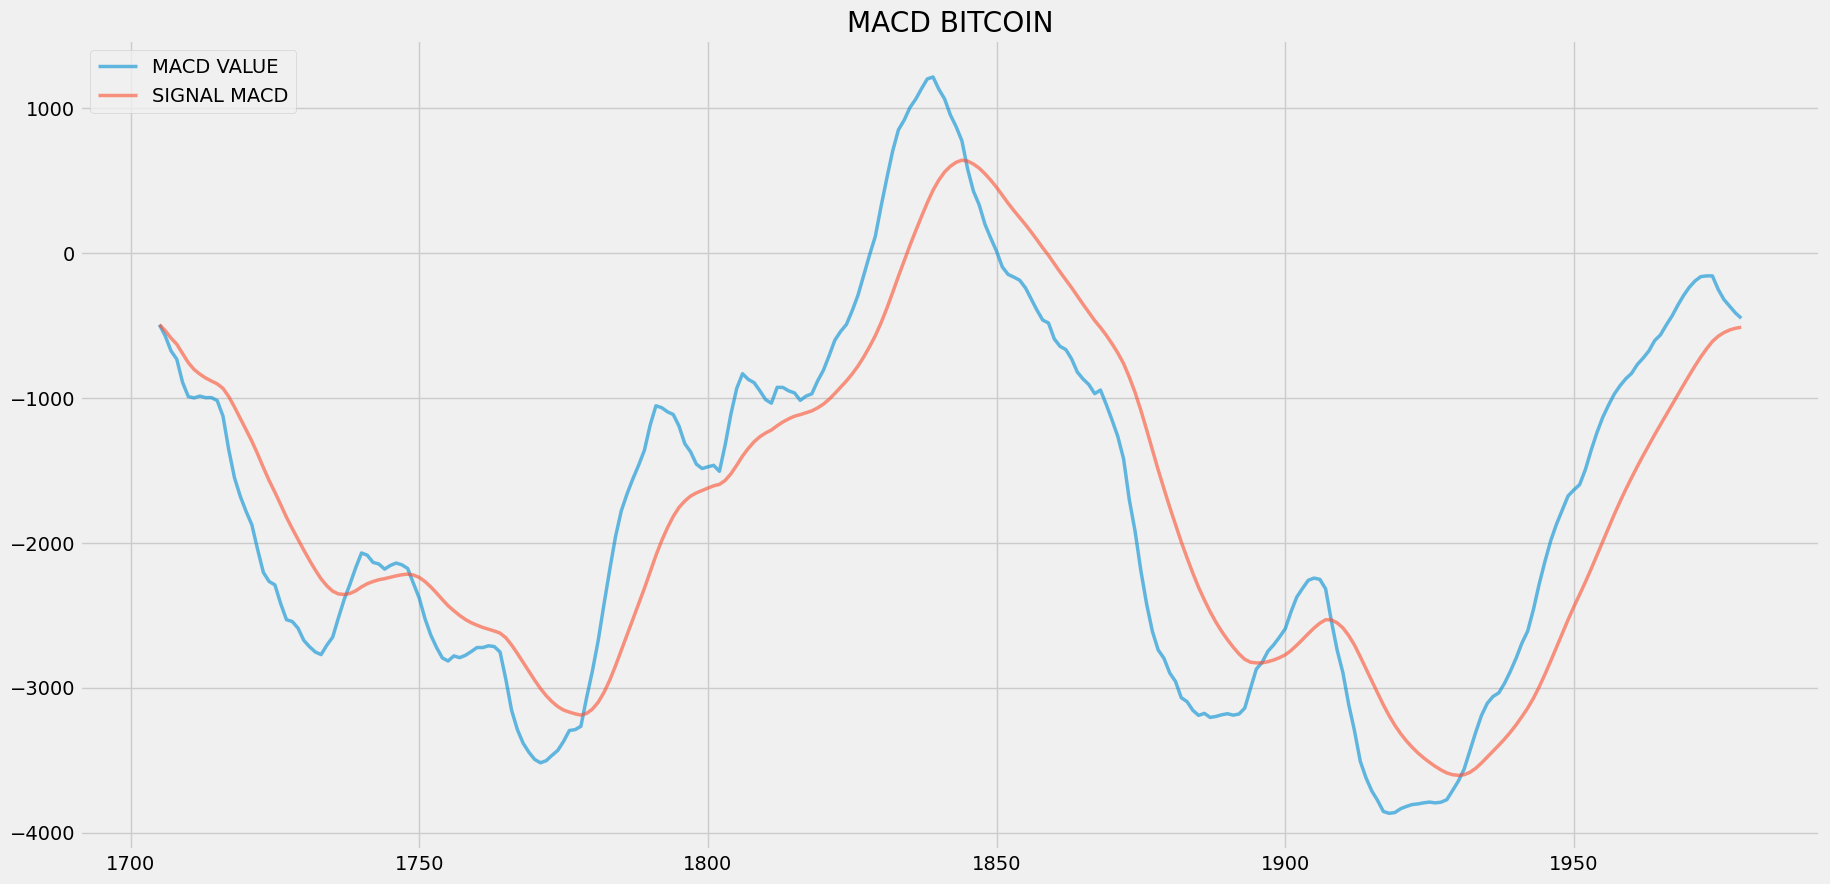

In [41]:
plt.figure()
plt.plot(df_one_year_btc.macd_val, linewidth=2.5, alpha=0.6, label='MACD VALUE')
plt.plot(df_one_year_btc.macd_signal_line,linewidth=2.5, alpha=0.6, label='SIGNAL MACD')
plt.legend(loc='upper left')
plt.title('MACD BITCOIN')
plt.show()